In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

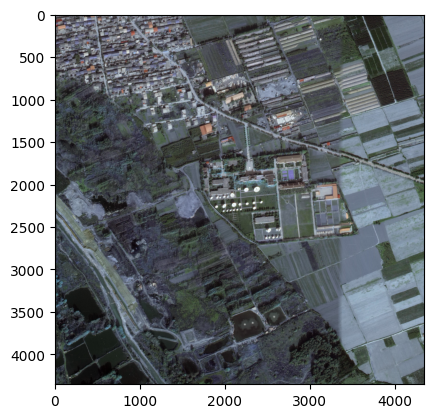

In [2]:
path = 'C:/Users/ABC/Downloads/Telegram Desktop/Xian_station-CN_GoogleSat_v0.tif'
img = cv2.imread(path)
# cv2.imshow(img, 'nothing')
plt.figure()
plt.imshow(img)

In [3]:
img.shape

(4352, 4352, 3)

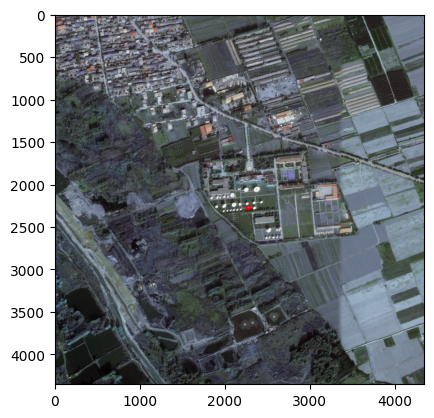

In [75]:
pointCenter = np.array([img.shape[1]/2, img.shape[0]/2])
pointR = np.array([pointCenter[0] + 100, pointCenter[1] + 100])
color = (255, 0, 0)
radius =20
thickness = 20
imgCopy = img.copy()
imgCopy = cv2.circle(imgCopy,(int(pointR[0]), int(pointR[1])), radius, color, thickness)
plt.figure()
plt.imshow(imgCopy)

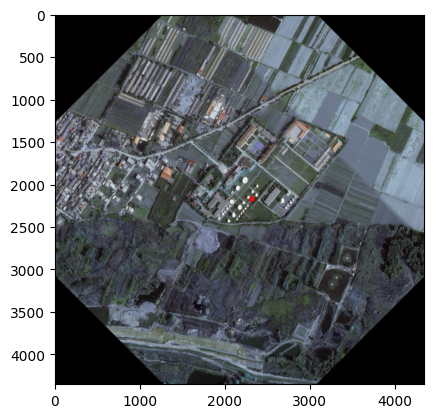

In [76]:

vect2D = pointR - pointCenter
Ox = np.array([0, 1])
Oy = np.array([1,0])
roto = math.acos(vect2D.dot(Ox)  /(math.sqrt(Ox.dot(Ox)) * math.sqrt(vect2D.dot(vect2D))))
roto
M = cv2.getRotationMatrix2D((pointCenter[0], pointCenter[1]), roto * 180/math.pi, 1.0)
rotated = cv2.warpAffine(imgCopy, M, (img.shape[1], img.shape[0]))
plt.figure()
plt.imshow(rotated)

In [141]:
class Point:
    def __init__(self, x, y, z):
        self.x = float(x)
        self.y = float(y)
        self.z = float(z)
         

In [142]:

class Vect2D:
    def __init__(self, PointA ,PointB):
        x = PointB.x-PointA.x
        y = PointB.y - PointA.y
        z= PointB.z - PointA.z
        self.values = np.array([x, y, z])
    def leng(self):
        return math.sqrt(np.dot(self.values, self.values))
    def cos(self, Vect2D):
        return np.dot(self.values, Vect2D.values)/(self.leng()*Vect2D.leng())
    def plus(self, Vect2D):
        self.values += Vect2D.values
    def multiplication(self, alpha):
        self.values *= alpha

In [143]:
delta = 100
a = 4352
h = 10000
A = Point(0,0,0)
B = Point(0,a,0)
C = Point(a,a,0)
D = Point(a,0,0)
H = Point(a/2, a/2, 0)
R = Point(a/2 + delta, a/2,0)
S = Point(a/2, a/2, h)
SR = Vect2D(S, R)
HR = Vect2D(H, R)
SH = Vect2D(S,H)
RH = Vect2D(R,H)

In [144]:
sinTheta = SR.cos(HR)
cosTheta = SR.cos(SH)

In [145]:
kx = R.y - a/2
ky = R.x - a/2 
K = np.array([[0, 0, ky], [0,0, -kx],[-ky, kx, 0]])
I = np.diag(np.ones(3))
matrTransform = I + sinTheta*K + (1-cosTheta)*np.dot(K,K)
specialVect =np.dot(np.dot(K,matrTransform),RH.values)


$A^{'}$ это Точка пересечения SA и плоскость($\alpha$) при повороте исходной плоскости вокруг прямой d. Где прямая d - перпендикулярна SR(и OR) и проходящая точку R

$\vec{RA^{'}} = \vec{RA} + t * \vec{SA}$

Уравнение плоскости $\alpha$: $ (matrTransform * \vec{RO}) * \vec{RM} =0 \Leftrightarrow specialVect^T * \vec{RM} = 0$ $\forall M \in \alpha$ 

Подставить $\vec{RA^{'}} = \vec{RA} + t*\vec{SA} \Rightarrow specialVect^T * \vec{RA} + t * specialVect^T * \vec{SA} = 0 \Rightarrow t = -\frac{specialVect^T * \vec{RA}}{specialVect^T * \vec{SA}}$ 

In [157]:
def intersectionPoint(pointA, pointS, pointR, vect = specialVect):
    RA = Vect2D(pointR, pointA)
    SA = Vect2D(pointS, pointA)
    a = np.dot(vect, RA.values)
    b = np.dot(vect, SA.values)
    SA.multiplication(-a/b)
    RA.plus(SA)
    OR = Vect2D( Point(0,0,0),pointR)
    OR.plus(RA)
    return OR.values
tA = intersectionPoint(A, S, R)
tB = intersectionPoint(B, S, R)
tC =intersectionPoint(C, S, R)
tD = intersectionPoint(D, S, R)
    
